In [32]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
# file_path = "../../data/prep_survey_profile.csv"  
file_path = "selected_features_rfe.csv"
survey_df = pd.read_csv(file_path)
survey_df['yearly_compensation'].isna().sum()

X = survey_df.drop('yearly_compensation', axis=1)
y = survey_df['yearly_compensation']

# Split the dataset into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Split the temp dataset into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Print shapes to verify
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5459, 50)
Validation set shape: (1170, 50)
Testing set shape: (1170, 50)


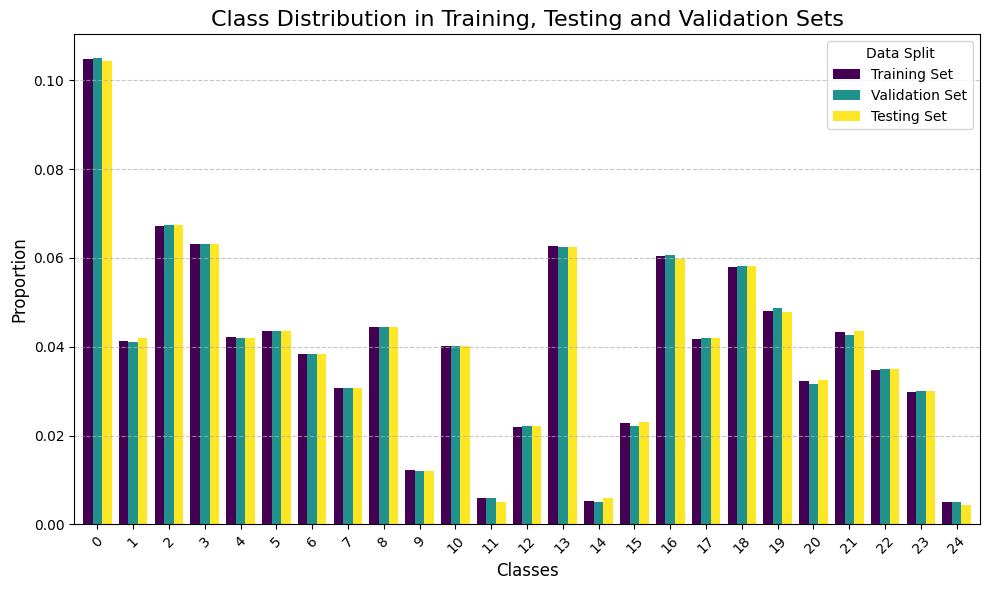

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution of target variable in the training and testing sets
train_distribution = y_train.value_counts(normalize=True)
validation_distribution = y_val.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

# Combine distributions into a single DataFrame for comparison
distribution_df = pd.DataFrame({
    'Training Set': train_distribution,
    'Validation Set': validation_distribution,
    'Testing Set': test_distribution
}).fillna(0)  # Fill missing values with 0 in case some classes are absent in a split

# Bar Chart Visualization
def plot_bar_chart(data, title):
    ax = data.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title='Data Split', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot the bar chart
plot_bar_chart(distribution_df, "Class Distribution in Training, Testing and Validation Sets")


In [37]:
# Export training, validation, and testing sets to CSV
X_train.to_csv("../04_modelling/dataset/X_train.csv", index=False)
y_train.to_csv("../04_modelling/dataset/y_train.csv", index=False)
X_val.to_csv("../04_modelling/dataset/X_val.csv", index=False)
y_val.to_csv("../04_modelling/dataset/y_val.csv", index=False)
X_test.to_csv("../04_modelling/dataset/X_test.csv", index=False)
y_test.to_csv("../04_modelling/dataset/y_test.csv", index=False)